<a href="https://colab.research.google.com/github/Saul-Ochoa/Classification-ML/blob/main/Binary%20Classification%20of%20Machine%20Failures/Binary_Classification_of_Machine_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification of Machine Failures**

In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.2 MB/s eta 0:00:00


## **Informe Basico**

In [66]:
# librerias
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, accuracy_score, average_precision_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
from sklearn.metrics import classification_report

In [4]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Classification-ML/main/Binary%20Classification%20of%20Machine%20Failures/sample_submission%20(1).csv'
train='https://raw.githubusercontent.com/Saul-Ochoa/Classification-ML/main/Binary%20Classification%20of%20Machine%20Failures/train.csv'
test='https://raw.githubusercontent.com/Saul-Ochoa/Classification-ML/main/Binary%20Classification%20of%20Machine%20Failures/test.csv'

In [5]:
train=pd.read_csv(train,sep=',')
test=pd.read_csv(test,sep=',')
submision=pd.read_csv(url,sep=',')

In [6]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [7]:
print('Train :', train.shape)
print('Test :', test.shape)
print('Submision :',submision.shape)

Train : (136429, 14)
Test : (90954, 13)
Submision : (90954, 2)


In [8]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [9]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [10]:
submision.head()

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [13]:
submision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               90954 non-null  int64  
 1   Machine failure  90954 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.4 MB


In [14]:
for column in train.columns:
    num_distinct_values = len(train[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

id: 136429 distinct values
Product ID: 9976 distinct values
Type: 3 distinct values
Air temperature [K]: 95 distinct values
Process temperature [K]: 81 distinct values
Rotational speed [rpm]: 952 distinct values
Torque [Nm]: 611 distinct values
Tool wear [min]: 246 distinct values
Machine failure: 2 distinct values
TWF: 2 distinct values
HDF: 2 distinct values
PWF: 2 distinct values
OSF: 2 distinct values
RNF: 2 distinct values


In [15]:
train.drop(columns='id',axis=1,inplace=True)

In [16]:
print("\nMissing values in each column:")
print(train.isnull().sum())


Missing values in each column:
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


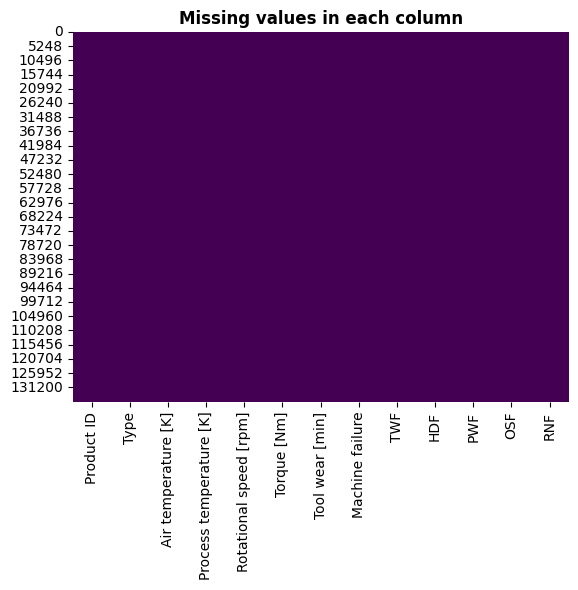

In [17]:
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in each column',fontsize=12,weight='bold')
plt.show()

**Datos Categoricos**

In [18]:
train.select_dtypes(include='object').columns

Index(['Product ID', 'Type'], dtype='object')

In [19]:
train['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

In [20]:
train['Type'].value_counts()

L    95354
M    32152
H     8923
Name: Type, dtype: int64

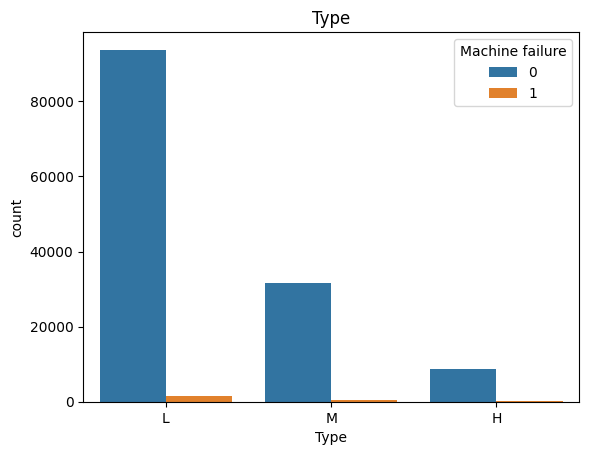

In [21]:
sns.countplot(data=train,x='Type',hue='Machine failure')
plt.title('Type',fontsize=12)
plt.show()

**Datos Númericos**

In [22]:
train.select_dtypes(include='number').columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

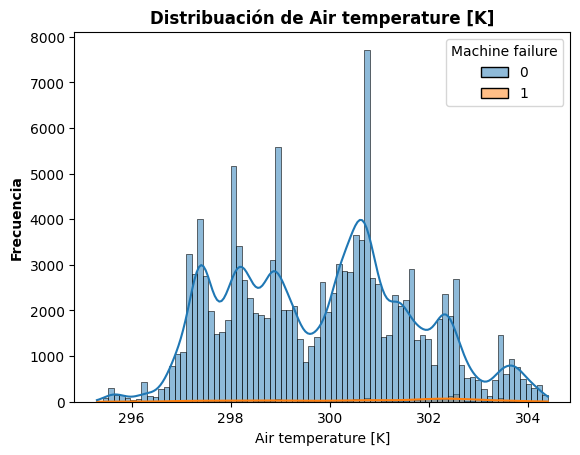

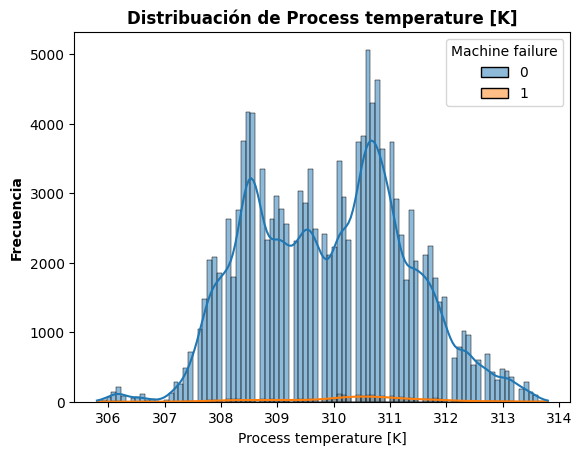

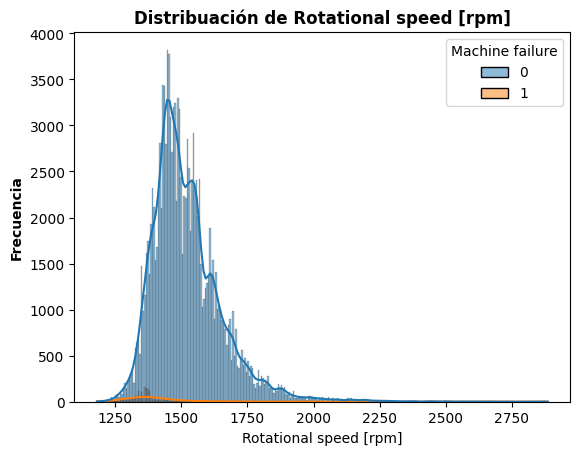

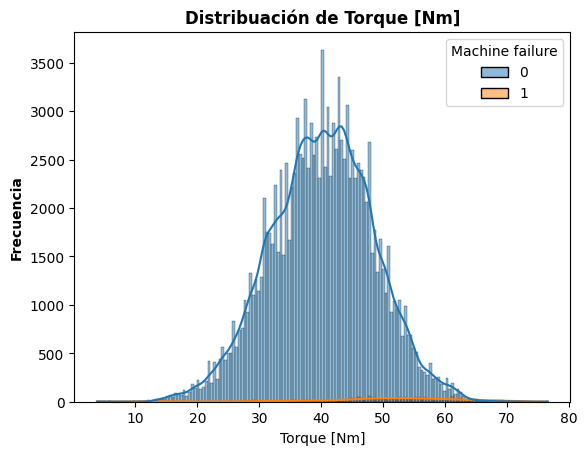

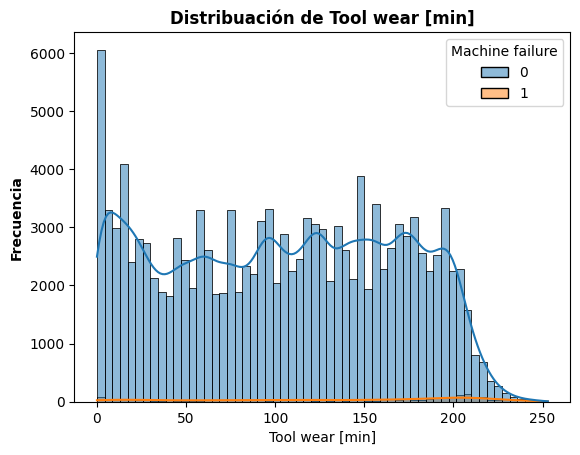

In [23]:
num=['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for i in num:
  sns.histplot(data=train,x=i,hue='Machine failure',kde=True)
  plt.title(f'Distribuación de {i}',fontsize=12,weight='bold')
  plt.ylabel('Frecuencia',weight='bold')
  plt.show()

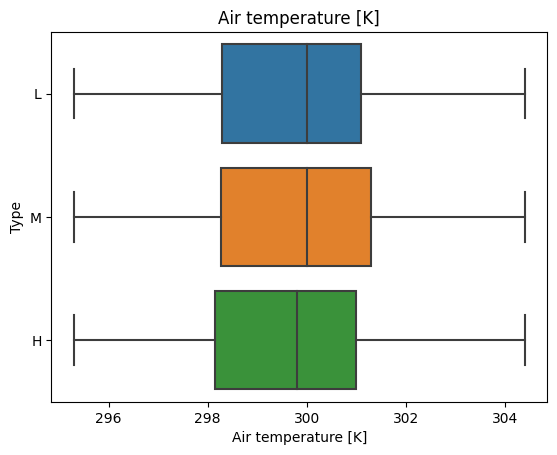

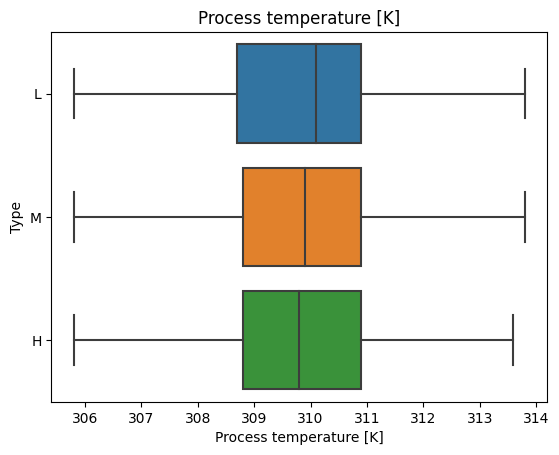

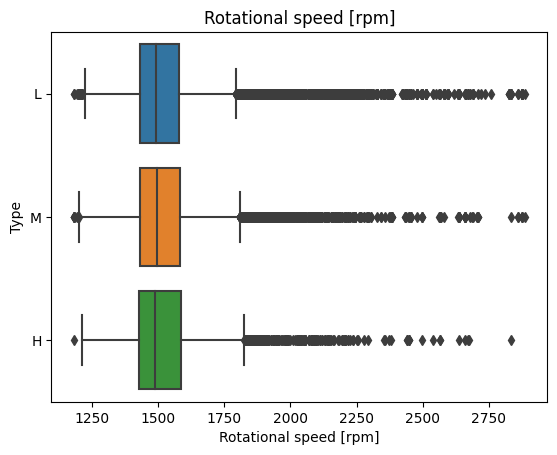

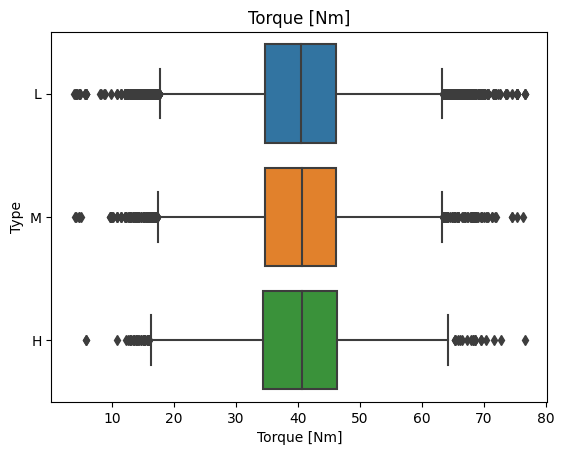

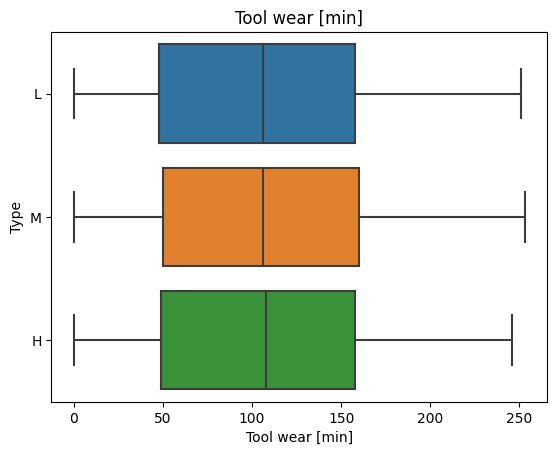

In [24]:
for i in num:
  sns.boxplot(data=train,x=i,y='Type')
  plt.title(i)
  plt.show()

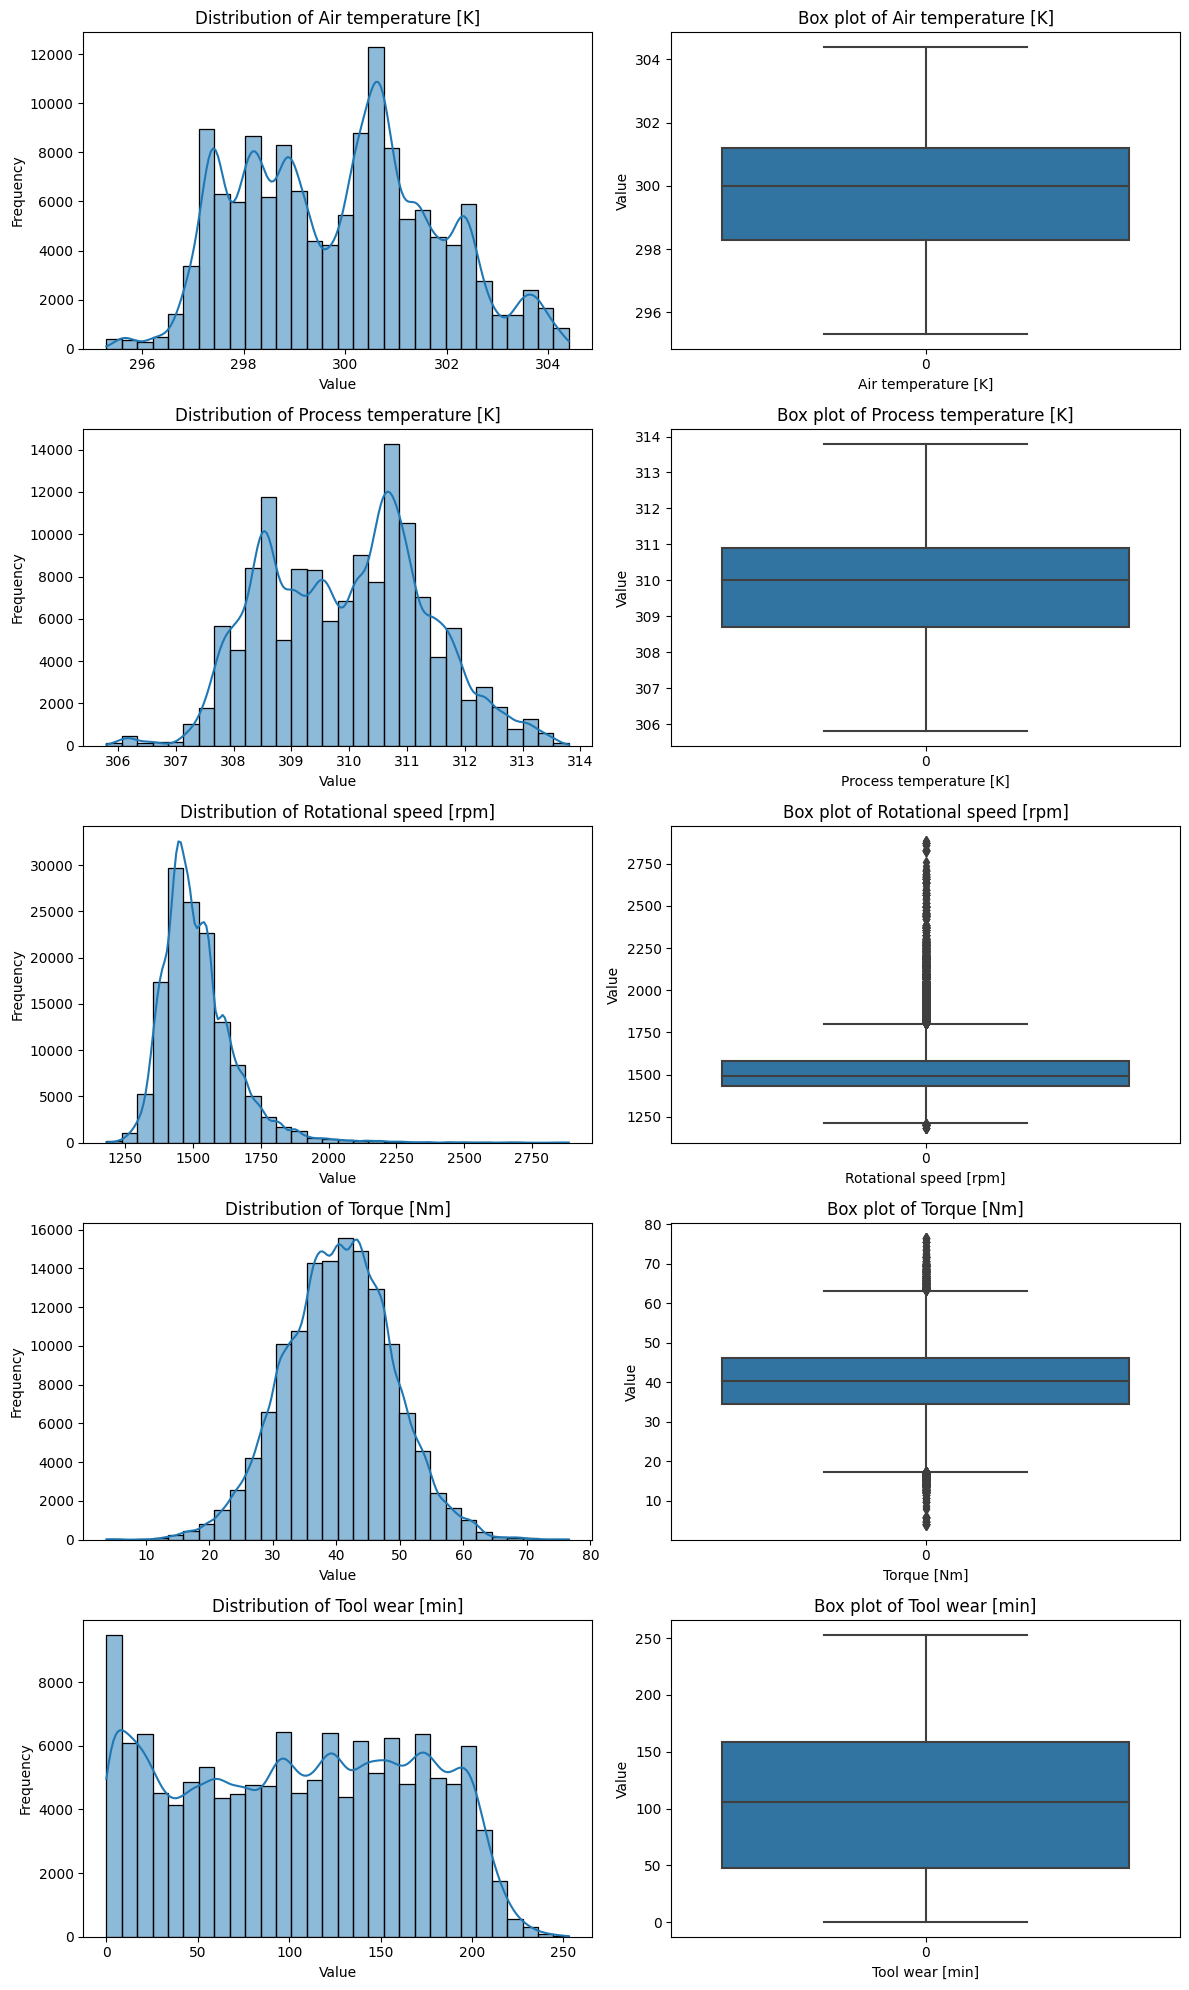

In [25]:
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 20))

# Plot the histograms and box plots
for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(train[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(train[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [26]:
train[num].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862776,309.941070,1520.331110,40.348643,104.408901
std,1.862247,1.385173,138.736632,8.502229,63.965040
min,295.300000,305.800000,1181.000000,3.800000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000


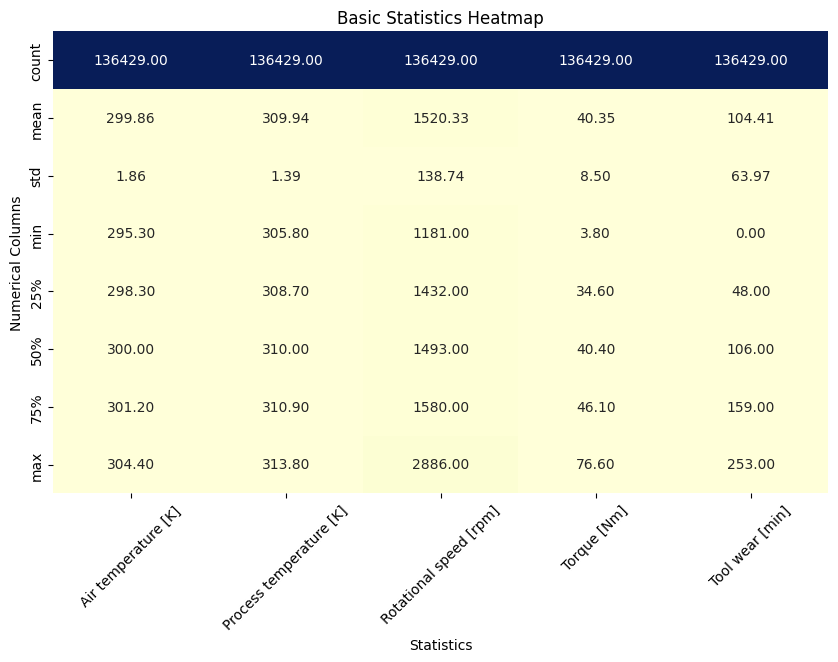

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(train[num].describe(), annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
plt.title("Basic Statistics Heatmap")
plt.xlabel("Statistics")
plt.ylabel("Numerical Columns")
plt.xticks(rotation=45)
plt.show()

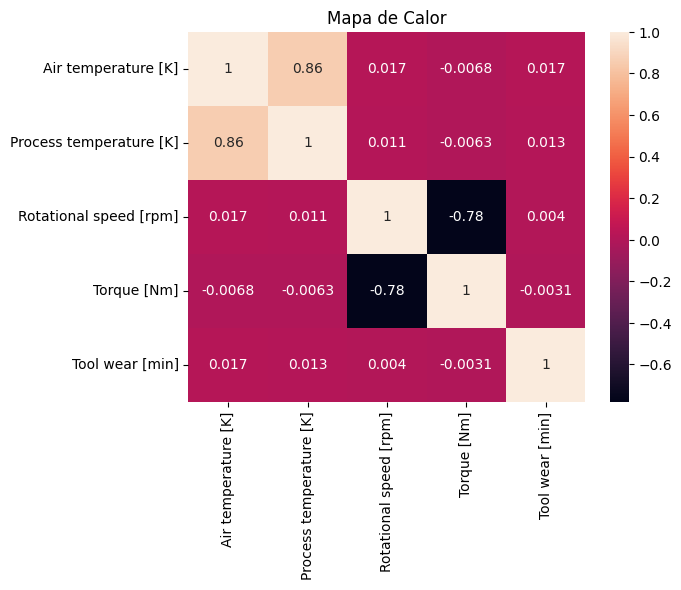

In [28]:
sns.heatmap(data=train[num].corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

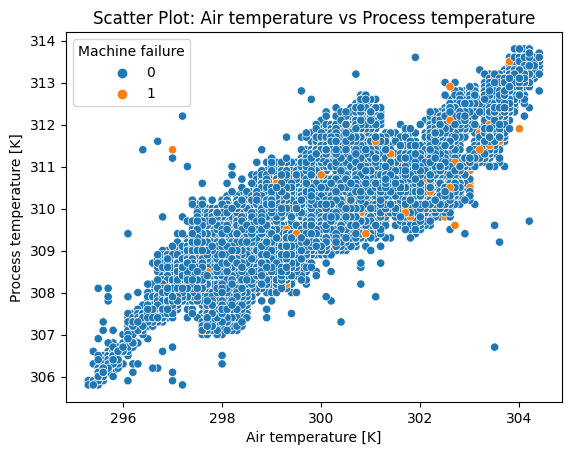

In [29]:
sns.scatterplot(data=train,x='Air temperature [K]',y='Process temperature [K]', hue='Machine failure')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.title('Scatter Plot: Air temperature vs Process temperature')
plt.show()

In [30]:
train.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

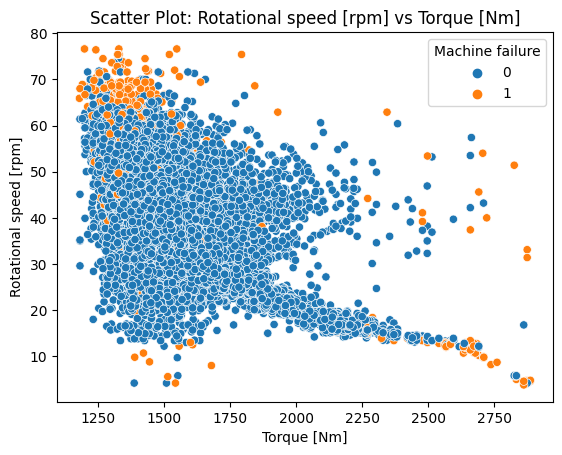

In [31]:
sns.scatterplot(data=train,y='Torque [Nm]',x='Rotational speed [rpm]', hue='Machine failure')
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational speed [rpm]')
plt.title('Scatter Plot: Rotational speed [rpm] vs Torque [Nm]')
plt.show()

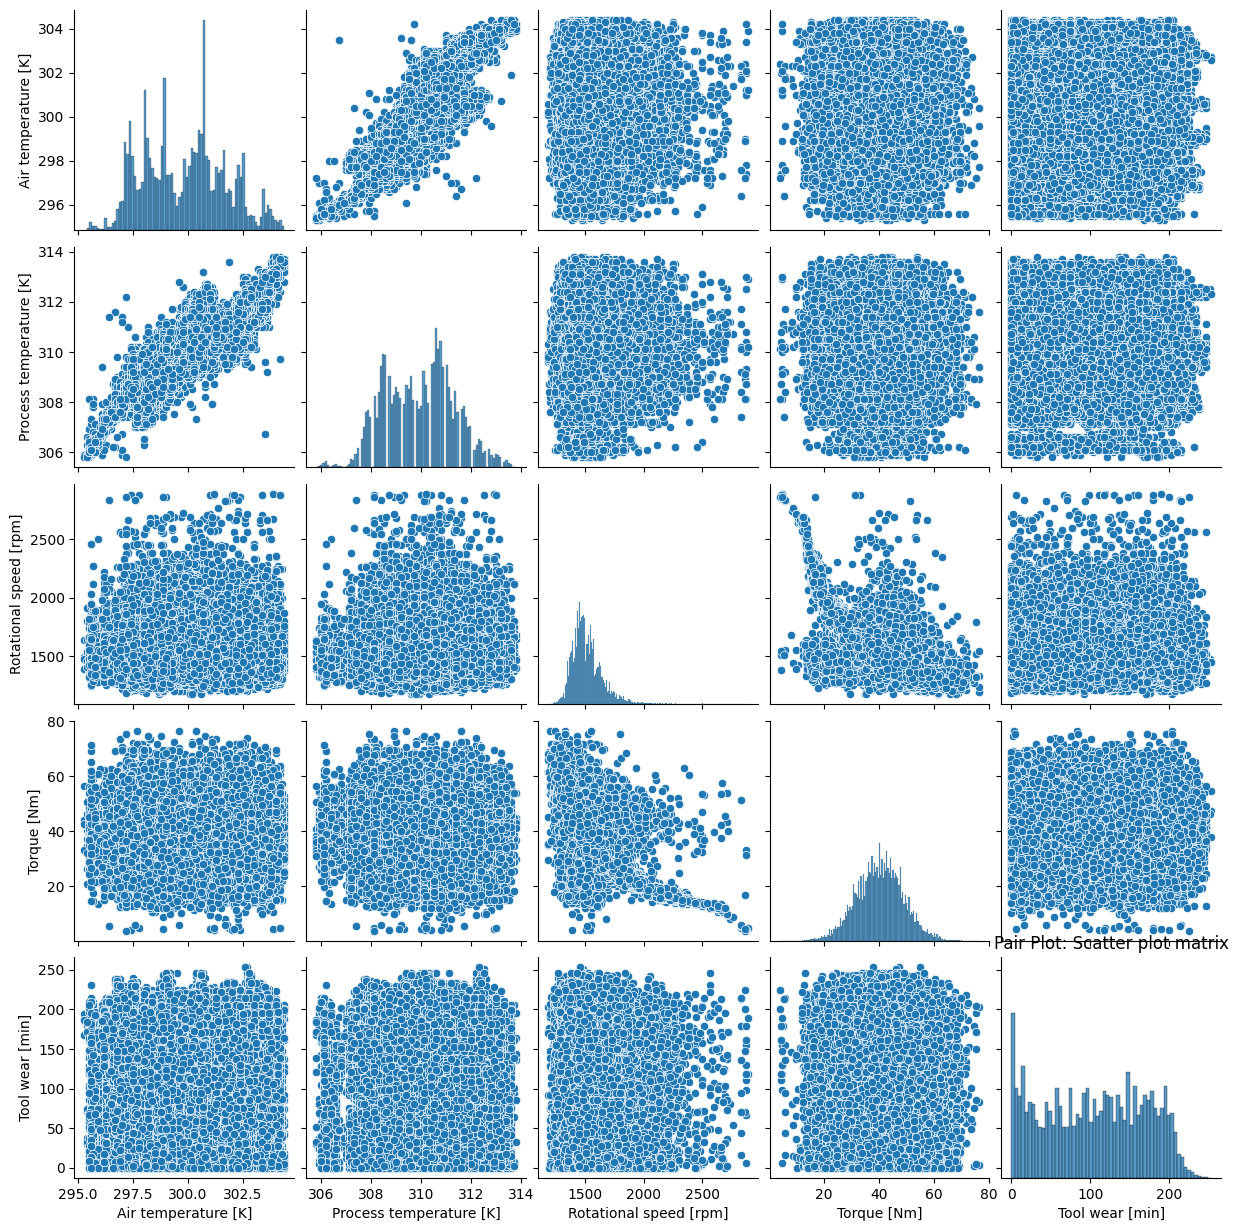

In [32]:
sns.pairplot(train[num])
plt.title('Pair Plot: Scatter plot matrix')
plt.show()

In [33]:
train[num].columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

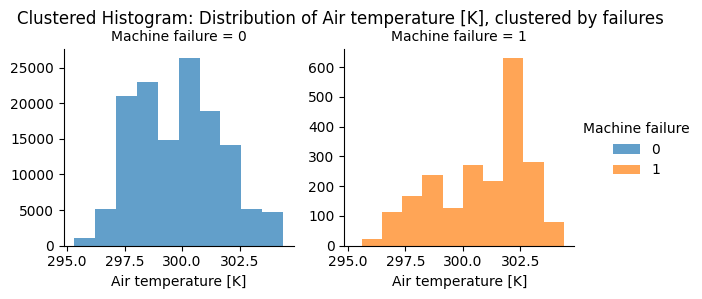

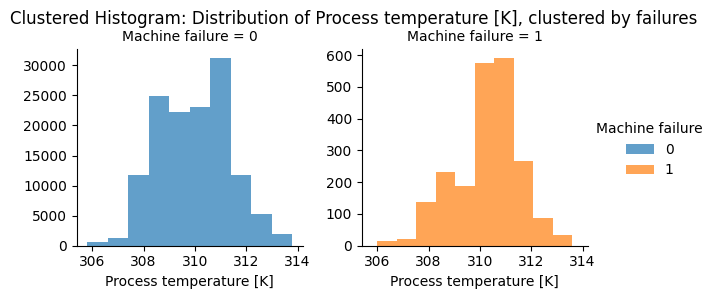

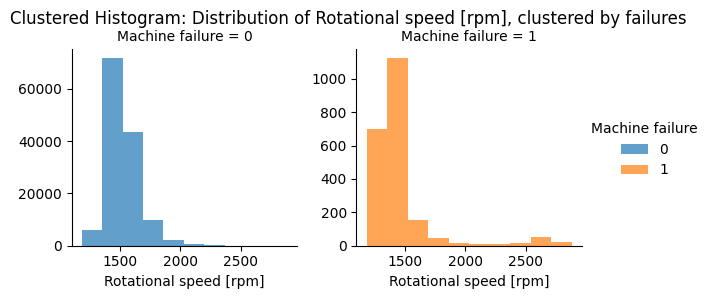

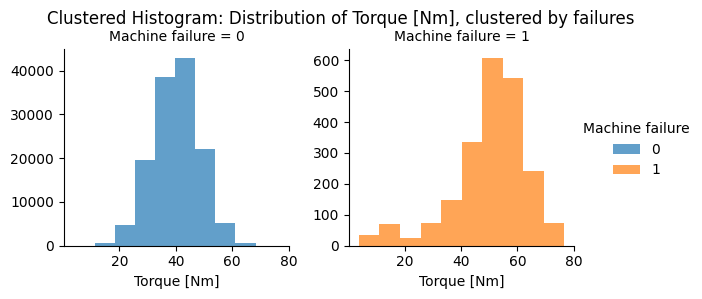

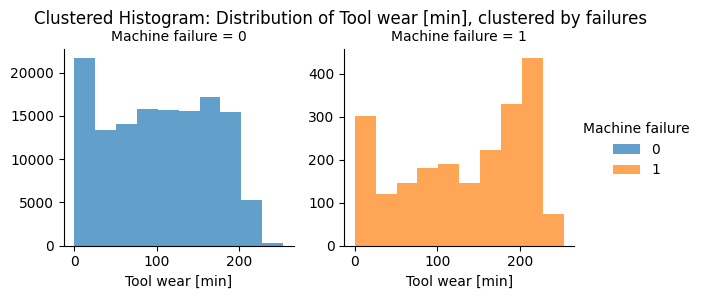

In [34]:
for i in num:
  g = sns.FacetGrid(train, col='Machine failure', hue='Machine failure', sharey=False)
  g.map(plt.hist, i, alpha=0.7)
  g.add_legend()
  g.fig.suptitle(f'Clustered Histogram: Distribution of {i}, clustered by failures')
  plt.subplots_adjust(top=0.85)
  plt.show()

**Datos Categoricos Numericos**

In [35]:
num_1=['TWF', 'HDF', 'PWF', 'OSF','RNF','Machine failure']
train[num_1].head()

,TWF,HDF,PWF,OSF,RNF,Machine failure
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


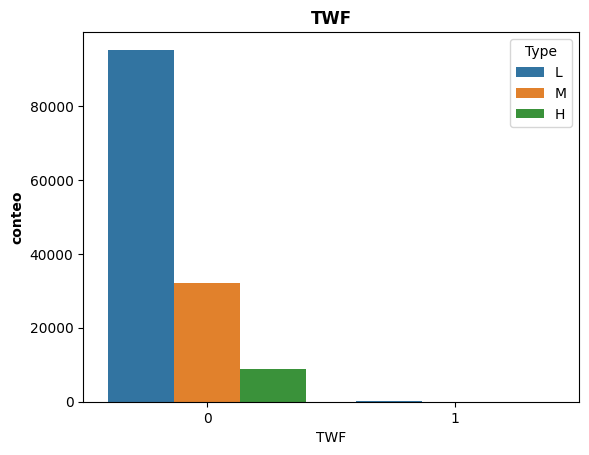

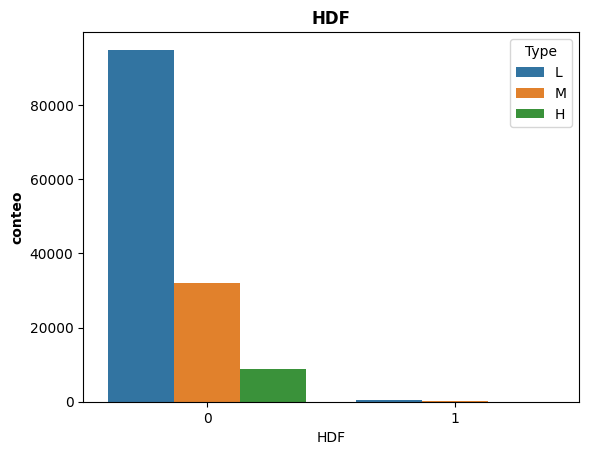

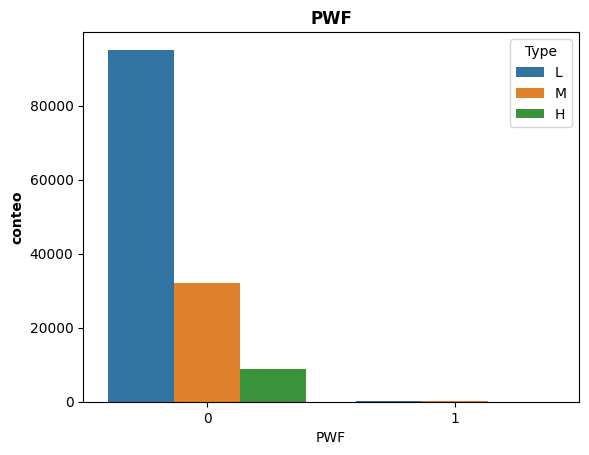

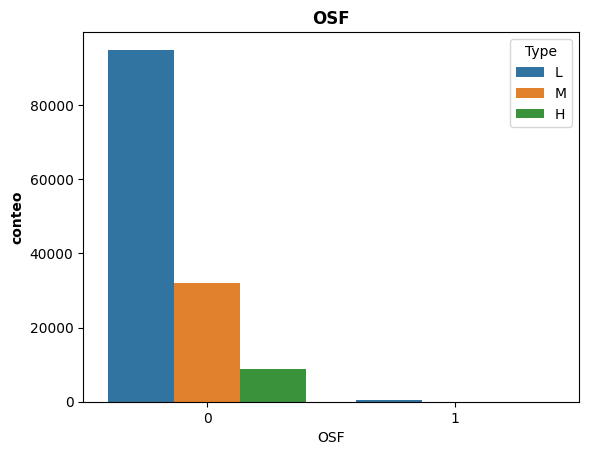

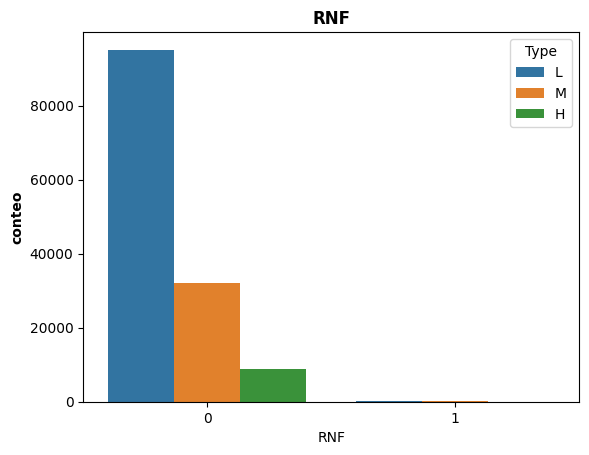

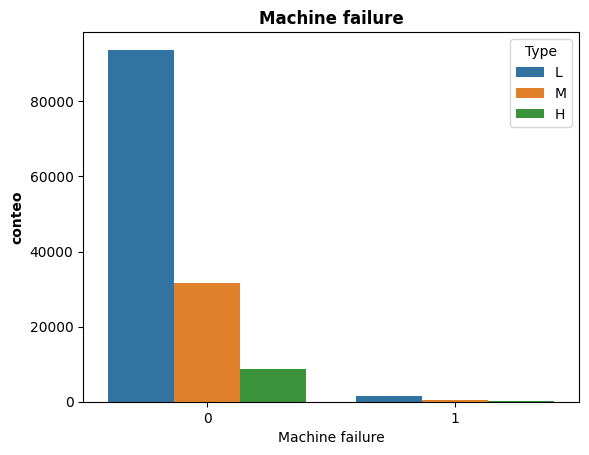

In [36]:
for i in num_1:
  sns.countplot(data=train,x=i,hue='Type')
  plt.title(i,fontsize=12,weight='bold')
  plt.ylabel('conteo',weight='bold')
  plt.show()

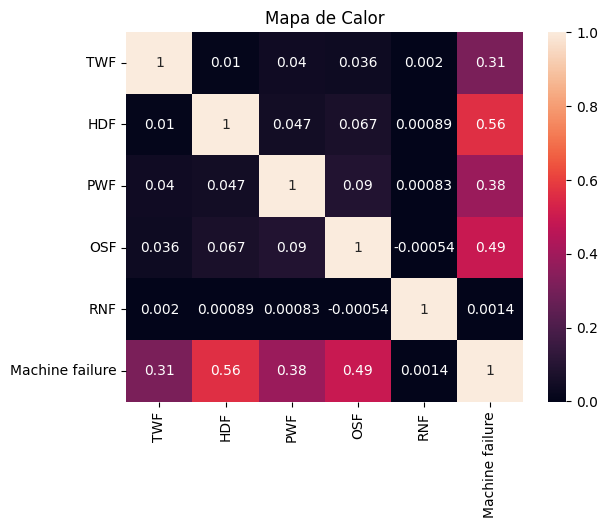

In [37]:
sns.heatmap(data=train[num_1].corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

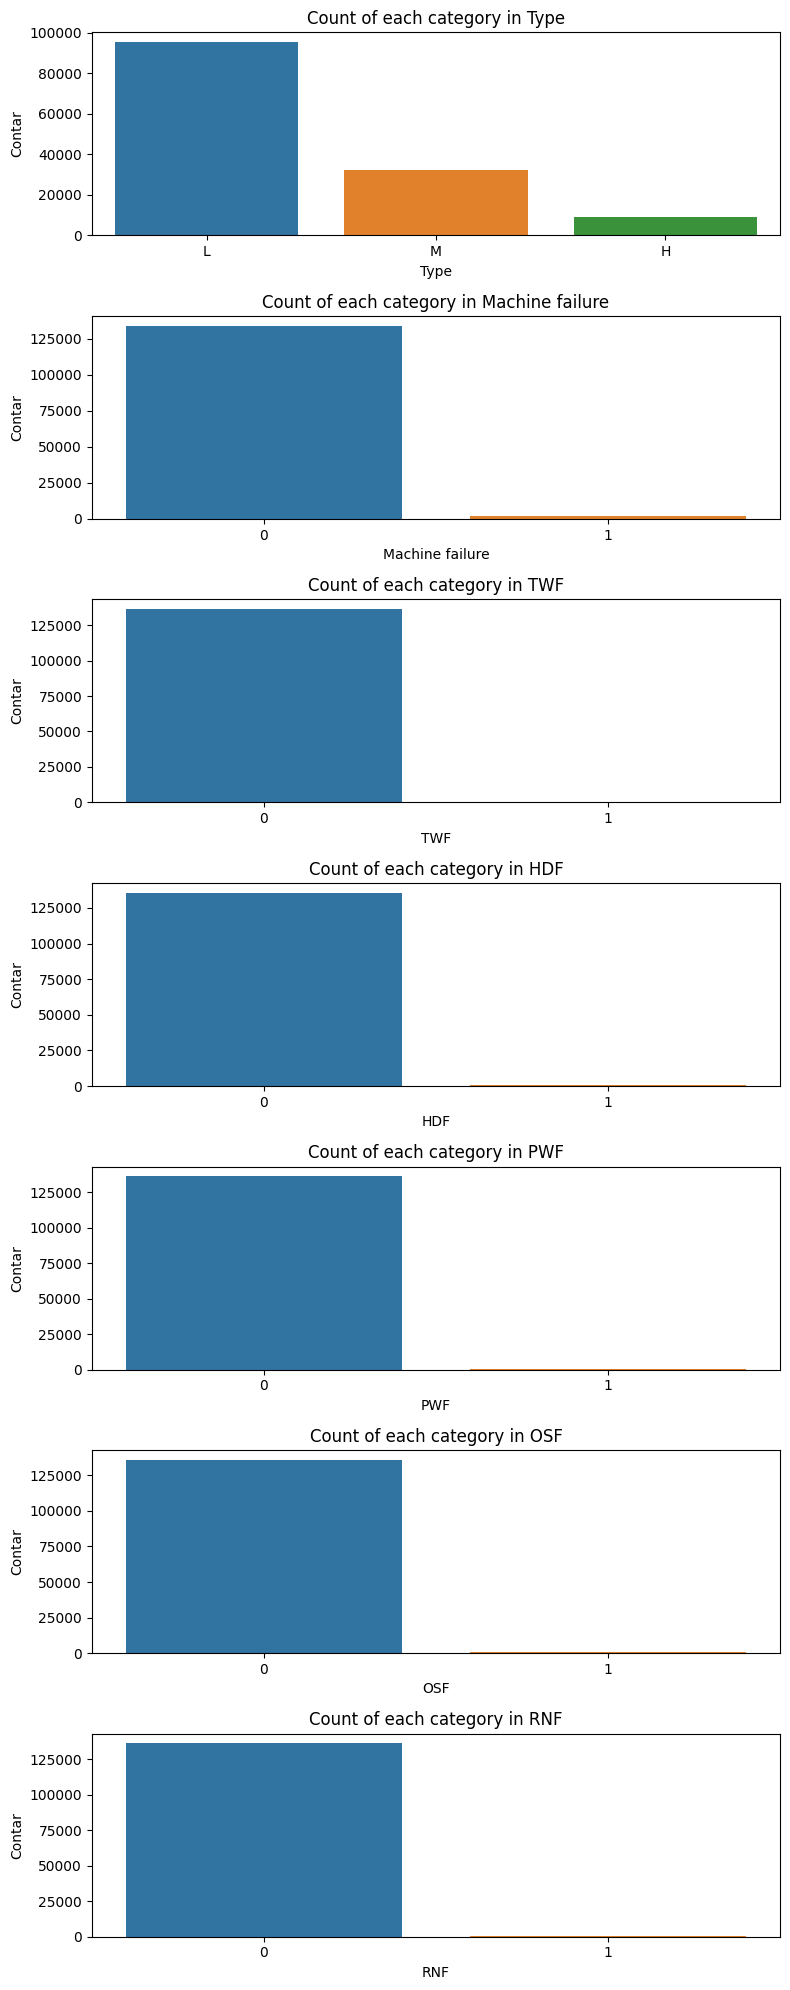

In [38]:
categorical_columns = ['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(8, 20))

# Plot the count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=train[column], ax=axes[i])
    axes[i].set_title(f'Count of each category in {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Contar')

plt.tight_layout()
plt.show()

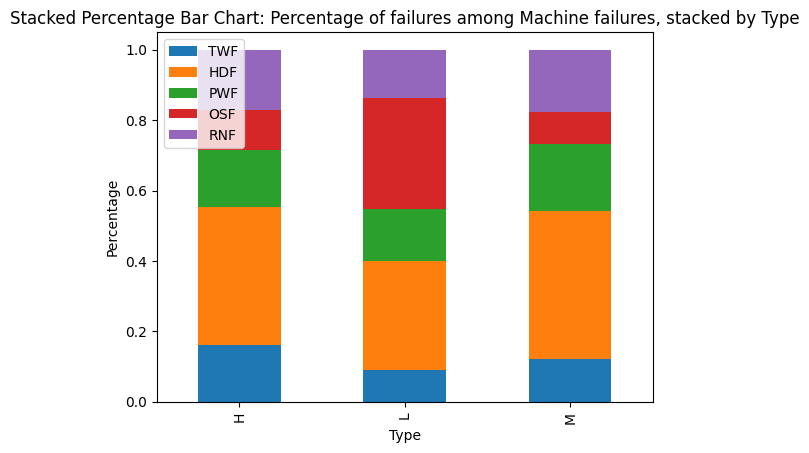

In [39]:
failure_counts_by_type = train.groupby('Type')[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
failure_counts_by_type.div(failure_counts_by_type.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Stacked Percentage Bar Chart: Percentage of failures among Machine failures, stacked by Type')
plt.show()

## **Data Preprocesing**

In [40]:
train.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [41]:
train.drop(columns='Product ID',axis=1,inplace=True)

In [42]:
df_encoded = pd.get_dummies(train, columns=['Type'])
df_encoded.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [43]:
scaler=StandardScaler()
columns_to_scale = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])
df_encoded.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,0,0,0,0,0,0,0,1,0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,0,0,0,0,0,0,0,0,1
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,0,0,0,0,0,0,0,1,0
3,0.610675,0.692284,0.026445,0.464745,1.447532,0,0,0,0,0,0,0,1,0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,0,0,0,0,0,0,0,0,1


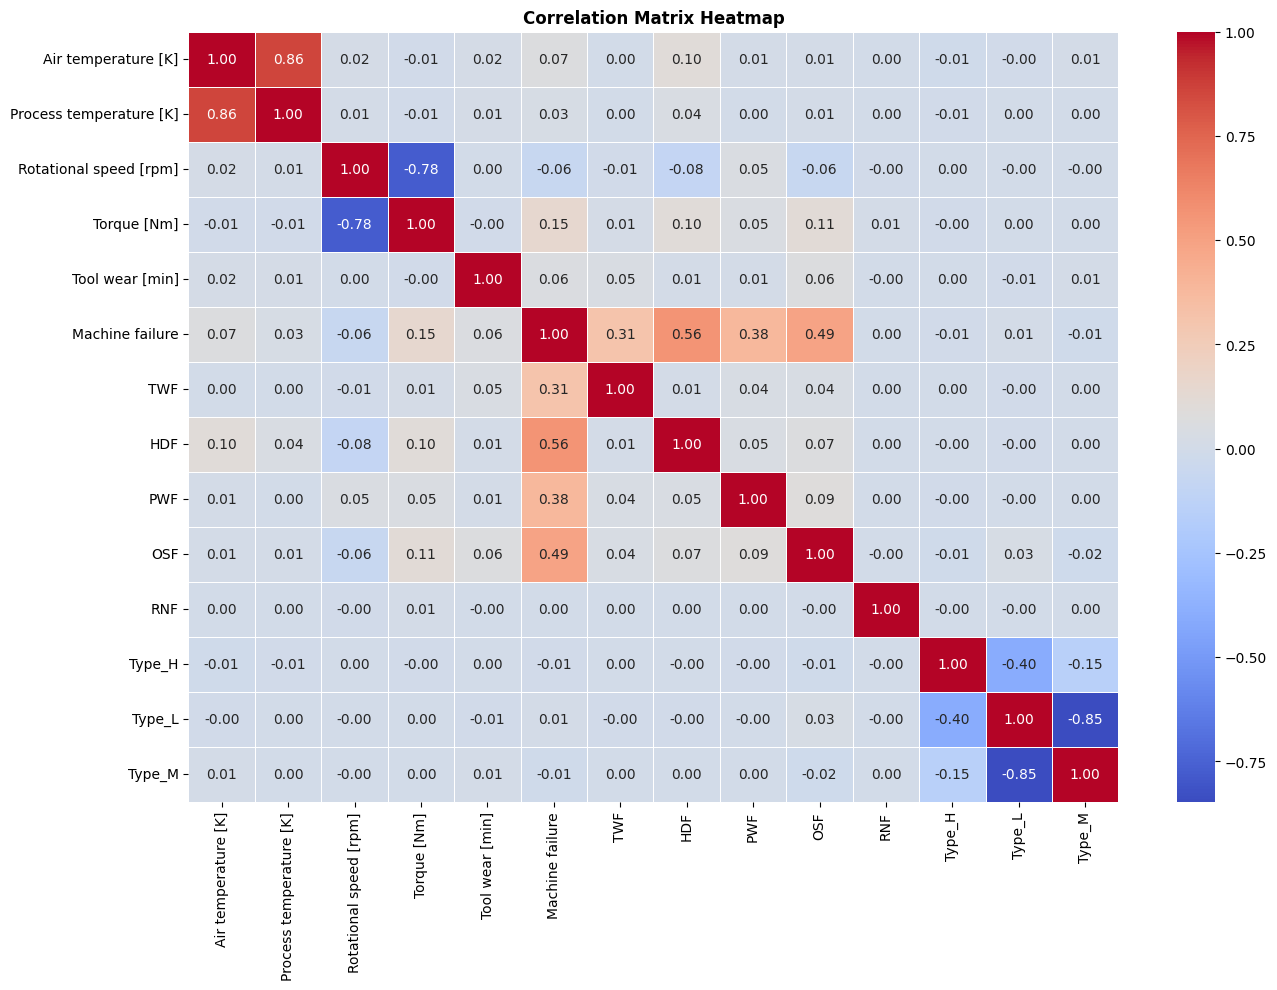

In [44]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap",fontsize=12,weight='bold')
plt.show()

In [45]:
df_encoded.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,0,0,0,0,0,0,0,1,0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,0,0,0,0,0,0,0,0,1
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,0,0,0,0,0,0,0,1,0
3,0.610675,0.692284,0.026445,0.464745,1.447532,0,0,0,0,0,0,0,1,0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,0,0,0,0,0,0,0,0,1


## **Train Test Split**

In [46]:
X=df_encoded.drop('Machine failure',axis=1)
y=df_encoded['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## **Tree**

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42, 100],
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random']
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 100, 'splitter': 'random'}


In [59]:
dtree = DecisionTreeClassifier(random_state=100, max_depth=4, min_samples_leaf=1, min_samples_split=2, class_weight='balanced',criterion='gini',splitter='random')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=100,
                       splitter='random')

In [60]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

Accuracy Score : 99.56 %
F-1 Score :  0.9956021402917247
Precision Score :  0.9956021402917247
Recall Score :  0.9956021402917247
Jaccard Score :  0.9912427935488579
Log Loss :  0.15851493097903924


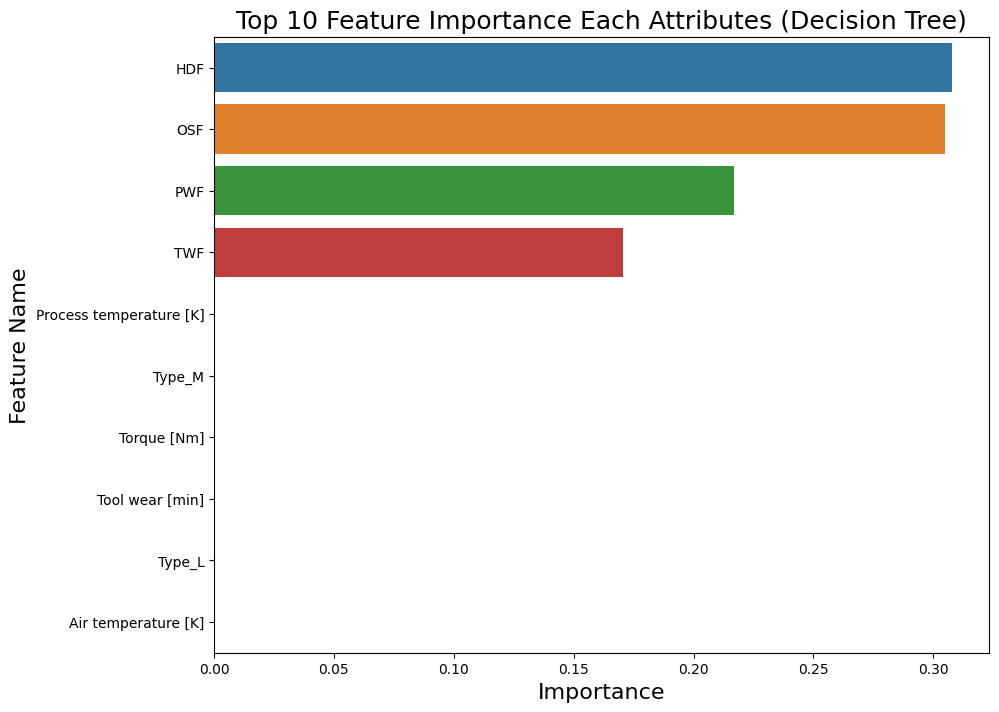

In [61]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

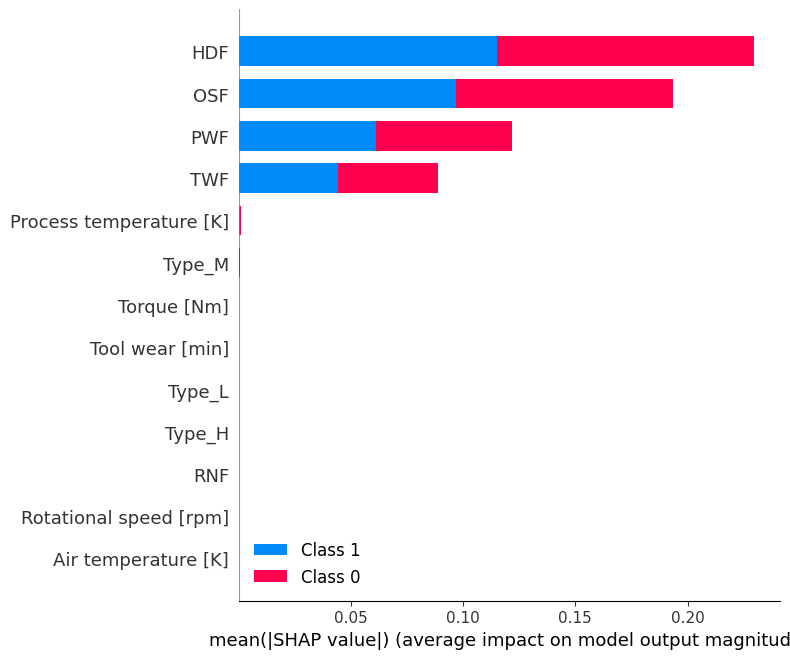

In [62]:
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.9956021402917247')

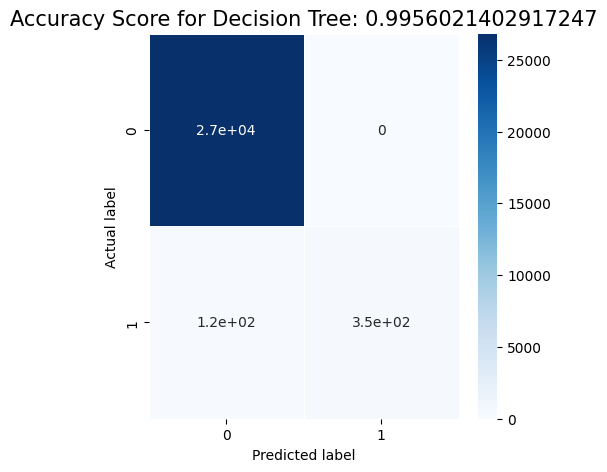

In [63]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26818
           1       1.00      0.74      0.85       468

    accuracy                           1.00     27286
   macro avg       1.00      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



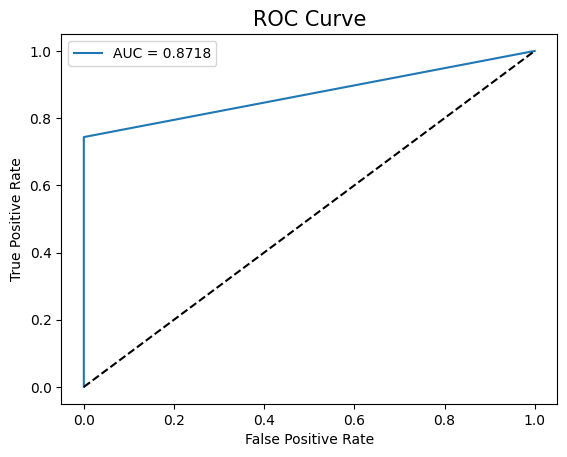

In [64]:
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

## **AdaBost**

In [72]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
    'algorithm':['SAMME', 'SAMME.R']
    }
# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(adb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [73]:
# Print the best hyperparameters
print(grid_search.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 50}


In [74]:
adb = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1, n_estimators=50)
adb.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [75]:
y_pred = adb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 99.55 %


In [76]:
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9954555449681155
Precision Score :  0.9954555449681155
Recall Score :  0.9954555449681155
Jaccard Score :  0.990952207223641
Log Loss :  0.16379876201167387


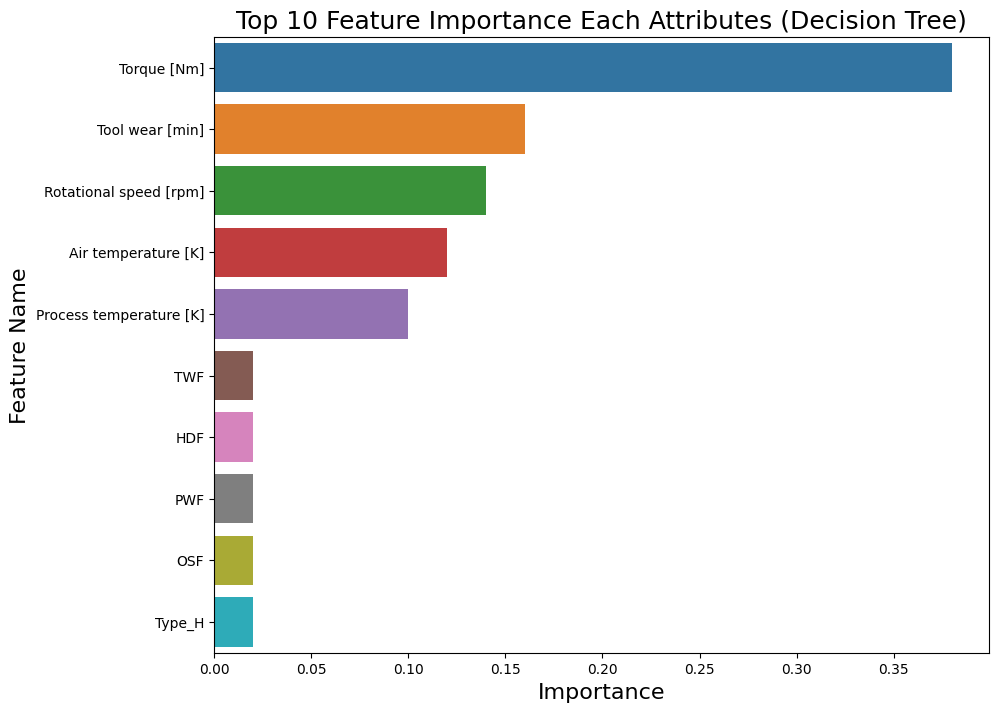

In [82]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": adb.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for XGBoost: 0.9954555449681155')

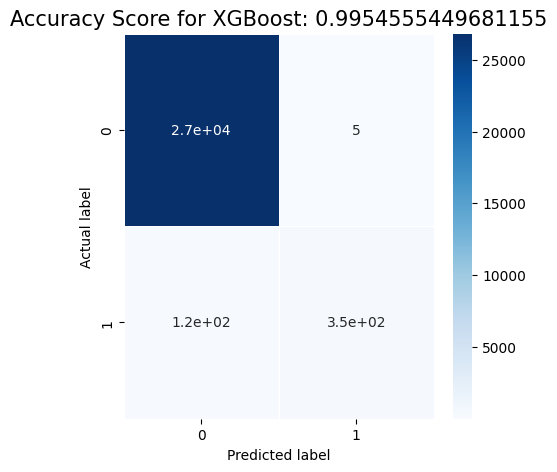

In [79]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(adb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

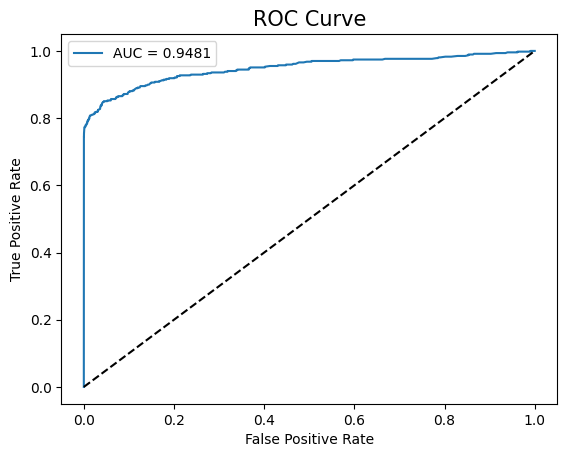

In [77]:
y_pred_proba = adb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()